In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats as st 

POR INTERFERÊNCIA
Encontrar lambda = (d/D)*(L/m) (comprimento de onda)

In [2]:
d1 = np.array([0.00025,0.0005,0.00025,0.0005]) #metros
L1 = np.array([0.03,0.0314,0.015,0.0139]) #metros
m1 = np.array([12,26,7,11])
D1 = 0.905 #metros

In [3]:
l1 = (d1/D1)*(L1/m1)*10**10
print("lambda (A): ", l1)

lambda (A):  [6906.07734807 6672.33319167 5919.49486977 6981.41637368]


In [4]:
# média
media = np.sum(l1)/np.size(l1)
print("média = {} Angstroms".format(np.round(media,2)))

média = 6619.83 Angstroms


In [5]:
# desvio padrão
dsv = np.std(l1)
print("Desvio Padrão: {}".format(np.round(dsv,2)))



Desvio Padrão: 420.09


In [6]:
#Erro Padrão
E_p = dsv/np.size(l1)
print("Erro Padrão: {}".format(np.round(E_p,2)))

Erro Padrão: 105.02


In [7]:
print("λ1: ", np.round(media,2), "±", np.round(E_p,2),"Angstroms ~ 10^-10 m")

λ1:  6619.83 ± 105.02 Angstroms ~ 10^-10 m


ENCONTRAR POR DIFRAÇÃO
Encontrar lambda = (d/D)*(L/m) (comprimento de onda)

In [8]:
d2 = np.array([0.02*10**-3,0.04*10**-3,0.08*10**-3,0.16*10**-3]) #metros
L2 = np.array([17.58*10**-2,8.29*10**-2,4.29*10**-2,7.40*10**-2]) #metros
m2 = np.array([6,6,6,20])
D2 = 0.905 #metros
print(d2)
print(L2)

[2.0e-05 4.0e-05 8.0e-05 1.6e-04]
[0.1758 0.0829 0.0429 0.074 ]


In [9]:
l2 = (d2/D2)*(L2/m2)*10**10
print("lambda (A): ", l2)

lambda (A):  [6475.13812155 6106.81399632 6320.44198895 6541.43646409]


In [10]:
# média
media2 = np.sum(l2)/np.size(l2)
print("média = {} Angstroms".format(np.round(media2,2)))

média = 6360.96 Angstroms


In [11]:
# desvio padrão
dsv = np.std(l2)
print("Desvio Padrão: {}".format(np.round(dsv,2)))

Desvio Padrão: 167.21


In [12]:
#Erro Padrão
E_p2 = dsv/np.size(l2)
print("Erro Padrão: {}".format(np.round(E_p2,2)))

Erro Padrão: 41.8


In [13]:
print("λ2: ", np.round(media2,2), "±", np.round(E_p2,2),"Angstroms ~ 10^-10 m")

λ2:  6360.96 ± 41.8 Angstroms ~ 10^-10 m


In [14]:
l_ref = 6328 #angstroms

In [15]:
sig1= np.sqrt((media - l_ref)**2)
sig2= np.sqrt((media2 - l_ref)**2)
print("discrepância interferencia: {} Angstroms".format(np.round(sig1,2)))
print("discrepância difração: {} Angstroms".format(np.round(sig2,2)))

discrepância interferencia: 291.83 Angstroms
discrepância difração: 32.96 Angstroms


In [21]:
#incerteza
inc = np.sqrt((E_p/media)**2 + (E_p2/media2)**2)
inp = np.multiply(l_ref,inc)
print('Incerteza do experimento: {} Angstroms.'.format(np.round(inp,2)))

Incerteza do experimento: 108.67 Angstroms.


In [23]:
i_1 = np.sqrt((sig1/media)**2)*l_ref
i_2 = np.sqrt((sig2/media2)**2)*l_ref
print('incerteza interferência: {} Angstroms.'.format(np.round(i_1,2)))
print('incerteza difração: {} Angstroms.'.format(np.round(i_2,2)))

incerteza interferência: 278.97 Angstroms.
incerteza difração: 32.79 Angstroms.


In [16]:
#Erro Relativo
er1 = (sig1/media)*100
er2 = (sig2/media2)*100
print("O Erro Relativo pela Interferência foi de {} %".format(np.round(er1,2)))
print("O Erro Relativo pela Difração foi de {} %".format(np.round(er2,2)))

O Erro Relativo pela Interferência foi de 4.41 %
O Erro Relativo pela Difração foi de 0.52 %


In [44]:
x_min = 6200
x_max = 6600
media_menos_1sigma = media - i_1
media_mais_1sigma =  media + i_1
media_menos_2sigma = media - 2*i_1
media_mais_2sigma = media +  2*i_1
media_menos_3sigma = media - 3*i_1
media_mais_3sigma = media + 3*i_1

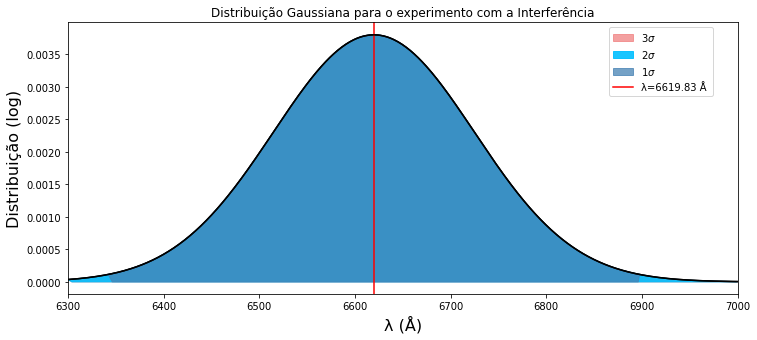

In [47]:
#Gaussiana para a Interferência
x_min = 6300
x_max = 7000
X = np.linspace(x_min, x_max, 500)
sigma_ = E_p
rv = norm(loc=media, scale=sigma_)
plt.figure(figsize=(12,5))
X_1sigma = X[ (X >= media_menos_1sigma) & (X <= media_mais_1sigma) ]
X_2sigma = X[ (X >= media_menos_2sigma) & (X <= media_mais_2sigma) ]
X_3sigma = X[ (X >= media_menos_3sigma) & (X <= media_mais_3sigma) ]

plt.plot( X, rv.pdf( X ), 'k-' )
plt.fill( np.concatenate( ( [ X_3sigma[3] ], X_3sigma, [ X_3sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma ), [ 0. ] ) ), color="lightcoral", alpha=0.75, label=r"$3\sigma$" )
plt.fill( np.concatenate( ( [ X_2sigma[3] ], X_2sigma, [ X_2sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_2sigma ), [ 0. ] ) ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
plt.fill( np.concatenate( ( [ X_1sigma[3] ], X_1sigma, [ X_1sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_1sigma ), [ 0. ] ) ), color="steelblue", alpha=0.75, label=r"$1\sigma$" )
handles, labels = plt.gca().get_legend_handles_labels()
order_ = [ 2, 1, 0 ]
handles_new = [ handles[idx_] for idx_ in order_ ]
labels_new = [ labels[idx_] for idx_ in order_ ]
plt.axvline(x=media,color='r', label='λ=6619.83 Å ')
plt.plot(X, rv.pdf(X), color='black')
plt.xlim(x_min, x_max)
plt.xlabel('λ (Å)', fontsize=16)
plt.ylabel('Distribuição (log)', fontsize=16)
plt.legend(bbox_to_anchor = (0.8, 1),loc=2)
plt.title('Distribuição Gaussiana para o experimento com a Interferência')
plt.show()

In [48]:
media_menos_1sigma = media2 - i_2
media_mais_1sigma =  media2 + i_2
media_menos_2sigma = media2 - 2*i_2
media_mais_2sigma = media2 +  2*i_2
media_menos_3sigma = media2 - 3*i_2
media_mais_3sigma = media2 + 3*i_2

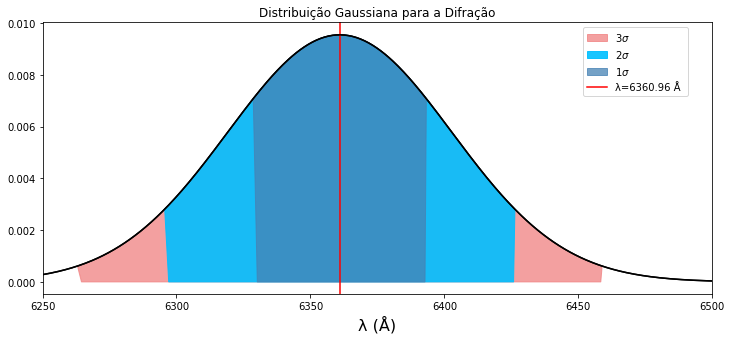

In [54]:
#Gaussiana para a Interferência
x_min = 6250
x_max = 6500
sigma = E_p2
rv = norm(loc=media2, scale=sigma)
X = np.linspace(x_min, x_max, 500)
plt.figure(figsize=(12,5))
X_1sigma = X[ (X >= media_menos_1sigma) & (X <= media_mais_1sigma) ]
X_2sigma = X[ (X >= media_menos_2sigma) & (X <= media_mais_2sigma) ]
X_3sigma = X[ (X >= media_menos_3sigma) & (X <= media_mais_3sigma) ]

plt.plot( X, rv.pdf( X ), 'k-' )
plt.fill( np.concatenate( ( [ X_3sigma[3] ], X_3sigma, [ X_3sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma ), [ 0. ] ) ), color="lightcoral", alpha=0.75, label=r"$3\sigma$" )
plt.fill( np.concatenate( ( [ X_2sigma[3] ], X_2sigma, [ X_2sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_2sigma ), [ 0. ] ) ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
plt.fill( np.concatenate( ( [ X_1sigma[3] ], X_1sigma, [ X_1sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_1sigma ), [ 0. ] ) ), color="steelblue", alpha=0.75, label=r"$1\sigma$" )
handles, labels = plt.gca().get_legend_handles_labels()
order_ = [ 2, 1, 0 ]
handles_new = [ handles[idx_] for idx_ in order_ ]
labels_new = [ labels[idx_] for idx_ in order_ ]
plt.axvline(x=media2,color='r', label='λ=6360.96 Å ')
plt.plot(X, rv.pdf(X), color='black')
plt.xlim(x_min, x_max)
plt.xlabel('λ (Å)', fontsize=16)
plt.legend(bbox_to_anchor = (0.8, 1),loc=2)
plt.title('Distribuição Gaussiana para a Difração')
plt.show()

In [19]:
i_s1= media + E_p
i_s2= media - E_p
d_s1= media2 + E_p2
d_s2= media2 - E_p2
print(i_s1,i_s2,d_s1,d_s2)

6724.8533696099885 6514.807521984606 6402.760808334499 6319.1544771167


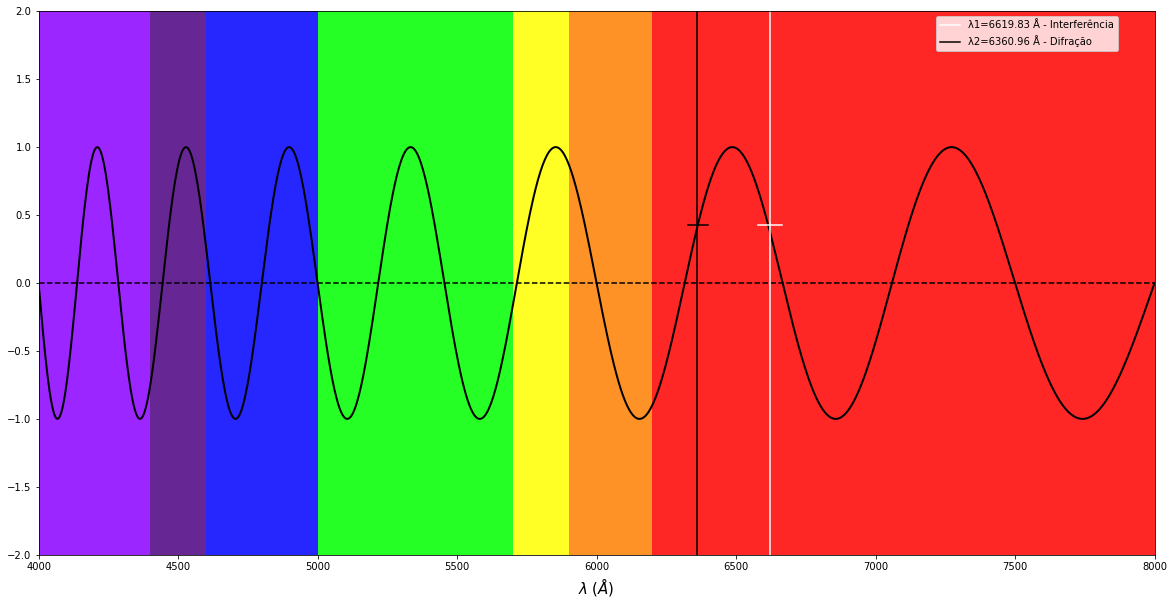

In [20]:
lmin, lmax = 4000,8000
x = np.linspace(lmin, lmax, 1000)
# A wave with a smoothly increasing wavelength
wv = (np.sin(10 * np.pi * x / (lmax+lmin-x)))[::-1]

fig = plt.figure(figsize=(20,10))
plt.plot(x, wv, c='black', lw=2)
plt.xlim(4000,8000)
plt.ylim(-2,2)

# Label and delimit the different regions of the electromagnetic spectrum
#ax.text(310, 1.5, 'UV', color='w', fontdict={'fontsize': 20})
# Horizontal "axis" across the centre of the wave
plt.axhline(c='black',linestyle='--')
# Ditch the y-axis ticks and labels; label the x-axis
plt.xlabel(r'$\lambda\; (Å)$', fontsize=15)
#interferencia
plt.axhline(y=0.43,xmin= 0.645, xmax= 0.666, c='white', linestyle='-')
plt.axvline(x= media, c='white', linestyle='-', label='λ1=6619.83 Å - Interferência')
#difração
plt.axvline(x= media2, c='black', linestyle='-', label='λ2=6360.96 Å - Difração')
plt.axhline(y=0.43,xmin= 0.582, xmax= 0.600, c='black', linestyle='-')

rainbow_rgb = { (4000, 4400): '#8b00ff', (4400, 4600): '#4b0082',
                (4600, 5000): '#0000ff', (5000, 5700): '#00ff00',
                (5700, 5900): '#ffff00', (5900, 6200): '#ff7f00',
                (6200, 8000): '#ff0000'}
for wv_range, rgb in rainbow_rgb.items():
    plt.axvspan(*wv_range, color=rgb, ec='none', alpha=0.85)

plt.legend(bbox_to_anchor = (0.8, 1),loc=2)
plt.show()